# 라이브러리

In [22]:
import pandas as pd
import numpy as np

# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
total_data = pd.read_csv('total_data.csv')
total_data

SUBJECT_ID  ITEMID   CHARTTIME TYPE
0                 9   50882  2149-11-09  LAB
1                 9   50931  2149-11-09  LAB
2                 9   50971  2149-11-09  LAB
3                 9   51275  2149-11-09  LAB
4                 9   51288  2149-11-09  LAB
...             ...     ...         ...  ...
9221915       99985   51288  2181-03-06  LAB
9221916       99985   51279  2182-03-14  LAB
9221917       99985   51006  2182-03-14  LAB
9221918       99985   51221  2182-03-14  LAB
9221919       99985   51222  2182-03-14  LAB

[9221920 rows x 4 columns]

# 환자의 입원 기간별 비율 
- min : 0일, max : 4058일(11년)
- 0이상 ~ 100미만 stay : 4967명/7799명 (63.68)
- 100이상 ~ 200미만 stay : 509명/7799명 (6.52)
- 200이상 ~ 300미만 stay : 341명/7799명 (4.37)
- 300이상 ~ 400미만 stay : 417명/7799명 (5.34)
> 0일이상 400일 미만으로 머무른 환자 수는 6234명이며 전체 환자 수의 79.9%이다.

# 0이상 ~ 100미만에 대한 10단위 세분화
- 0이상 ~ 10미만 : 1723명/7799명 (22.0)
- 10이상 20미만 : 1300명/7799명 (16.6)
- 20이상 30미만 : 688명/7799명 (8.82)
- 30이상 40미만 : 425명/7799명 (5.44)

# 장단기 data 후보
- 후보1) interval : 1일, total : 10일 (10) -> 기존의 데이터 / 'x_(7727, 10, 4069).npy'
- 후보2) interval : 2일, total : 20일 (10) -> 'x_int2_(7727, 10, 4069).npy'
- 후보3) interval : 3일, total : 30일 (10) -> 'x_int3_(7727, 10, 4069).npy'
- 후보4) interval : 2일, total : 60일 (30) -> 'x_int2_(7727, 30, 4069).npy'
- 후보5) interval : 3일, total : 90일 (30) -> 'x_int3_(7727, 30, 4069).npy'

In [2]:
import pandas as pd
import numpy as np

total_data = pd.read_csv('total_data.csv')

In [3]:
# stay를 위한 df
import datetime as dt

mn = total_data.pivot_table(columns=['SUBJECT_ID'],values=['CHARTTIME'],aggfunc='min').transpose()
mx = total_data.pivot_table(columns=['SUBJECT_ID'],values=['CHARTTIME'],aggfunc='max').transpose()
datecheck = pd.merge(mn, mx, on='SUBJECT_ID')
datecheck['CHARTTIME_x'] = pd.to_datetime(datecheck['CHARTTIME_x'])
datecheck['CHARTTIME_y'] = pd.to_datetime(datecheck['CHARTTIME_y'])
datecheck['stay']=(datecheck['CHARTTIME_y']-datecheck['CHARTTIME_x']).dt.days
datecheck

CHARTTIME_x CHARTTIME_y  stay
SUBJECT_ID                              
9           2149-11-09  2149-11-15     6
21          2134-08-20  2135-02-08   172
31          2108-08-22  2108-08-31     9
36          2131-04-30  2134-05-20  1116
37          2183-08-21  2184-04-27   250
...                ...         ...   ...
99863       2142-04-02  2142-05-08    36
99934       2110-02-28  2110-03-06     6
99937       2128-05-11  2128-05-20     9
99944       2161-02-16  2161-02-21     5
99985       2181-01-18  2182-03-14   420

[7799 rows x 3 columns]

In [4]:
# stay 0~4058일에 대한 10일 단위 구간화 
stay_df = pd.DataFrame(datecheck['stay'])
bins = list(range(0, 4200, 100))
bins_label = [str(x)+"이상 "+str(x+100)+"미만" for x in bins]
stay_df["level"] = pd.cut(stay_df['stay'], bins, right=False, labels=bins_label[:-1])
stay_df

stay          level
SUBJECT_ID                     
9              6      0이상 100미만
21           172    100이상 200미만
31             9      0이상 100미만
36          1116  1100이상 1200미만
37           250    200이상 300미만
...          ...            ...
99863         36      0이상 100미만
99934          6      0이상 100미만
99937          9      0이상 100미만
99944          5      0이상 100미만
99985        420    400이상 500미만

[7799 rows x 2 columns]

<AxesSubplot:ylabel='Count'>

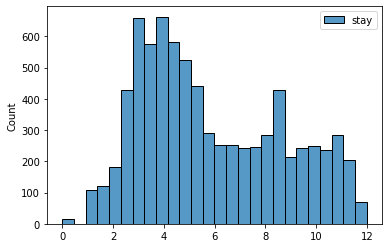

In [14]:
# stay에 따른 count
a = pd.DataFrame(stay_df['stay'])

import seaborn as sns
sns.histplot(a.apply(lambda x: np.log2(x+1)))

In [118]:
# stay 0~100일에 대한 10일 단위 구간화 
stay100 = stay_df[stay_df['level']=='0이상 100미만'].drop(columns='level')
bins = list(range(0, 110, 10))
bins_label = [str(x)+"이상 "+str(x+10)+"미만" for x in bins]
stay100["level"] = pd.cut(stay100['stay'], bins, right=False, labels=bins_label[:-1])
stay100

stay      level
SUBJECT_ID                 
9              6   0이상 10미만
31             9   0이상 10미만
41            32  30이상 40미만
101           11  10이상 20미만
103           20  20이상 30미만
...          ...        ...
99836         66  60이상 70미만
99863         36  30이상 40미만
99934          6   0이상 10미만
99937          9   0이상 10미만
99944          5   0이상 10미만

[4967 rows x 2 columns]

# 일자별 itemid abnormal 비율
- 마지막에 가까울수록 itemid abnormal 비율이 차이가 날까?
- 특히나 많아지는 날짜? -> 위독한 날짜인가? -> 10일치를 본 이유...

## 10일치 데이터

In [35]:
x = np.load('./x_(7727,10,4069).npy')

In [36]:
ab_rate = x.sum(axis=2)
ab_rate = pd.DataFrame(ab_rate)
ab_rate.columns = ['D-10','D-9','D-8','D-7','D-6',
            'D-5','D-4','D-3','D-2','D-1']
ab_rate

D-10   D-9   D-8   D-7   D-6   D-5   D-4   D-3   D-2   D-1
0      0.0   0.0   0.0   0.0   0.0  24.0  36.0  35.0  26.0  40.0
1      0.0  13.0  51.0  52.0  46.0  44.0  40.0  47.0  40.0   8.0
2      0.0   0.0  15.0  33.0  36.0  35.0  35.0  35.0  37.0  47.0
3     17.0  27.0  56.0  51.0  45.0  47.0  44.0  30.0  31.0  22.0
4      0.0   0.0   0.0   0.0   0.0  38.0  38.0  45.0  34.0  25.0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
7722  43.0  38.0  40.0  42.0  34.0  35.0  34.0  35.0  35.0  34.0
7723   0.0   0.0   0.0   0.0  39.0  35.0  26.0  29.0  23.0  21.0
7724   0.0  26.0  23.0  21.0  23.0  27.0  28.0  28.0  30.0  27.0
7725   0.0   0.0   0.0   0.0   0.0  29.0  37.0  49.0  46.0  44.0
7726  51.0  49.0  47.0  49.0  47.0  49.0  43.0  42.0  34.0  31.0

[7727 rows x 10 columns]

In [79]:
ab_rate['10~6']=ab_rate.iloc[:,0:5].sum(axis=1)
ab_rate['5~1']=ab_rate.iloc[:,5:].sum(axis=1)
ab_rate['10~6'].mean()
ab_rate['5~1'].mean()

113.61330399896467

528.7231784651223

In [37]:
ab_rate.mean()

D-10    18.892455
D-9     20.683189
D-8     22.835124
D-7     24.646176
D-6     26.556361
D-5     28.360166
D-4     29.974117
D-3     30.854924
D-2     30.969199
D-1     30.589880
dtype: float64

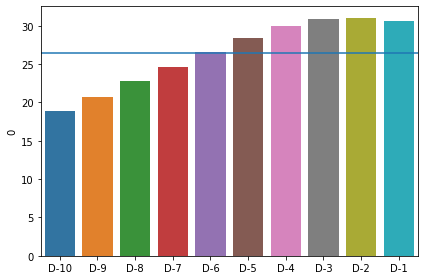

In [40]:
# D-1 ~ D-10별 각 환자의 ITEMID abnormal sum에 대한 평균 
m = pd.DataFrame(ab_rate.mean())

_ = sns.barplot(data=m,x=m.index,y=m[0])
_ = plt.tight_layout()
_ = plt.axhline(y=m.mean().values)

## 30일치 데이터

In [41]:
x_30 = np.load("x_(7727,30,4068).npy")

In [42]:
ab_rate2 = x_30.sum(axis=2)
ab_rate2 = pd.DataFrame(ab_rate2)
ab_rate2.columns = [f'D-{x}' for x in range(30,0,-1)]
ab_rate2

D-30  D-29  D-28  D-27  D-26  D-25  D-24  D-23  D-22  D-21  ...  D-10  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      5.0   9.0   8.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  17.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
7722  48.0  50.0  45.0  45.0  52.0  53.0  48.0  52.0  54.0  65.0  ...  43.0   
7723   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
7724   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
7725   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
7726   0.0   0.0   0.0   0.0   0.0   9.0   0.0   0.0   0.0   0.0  ...  51.0   

       D-9   D-8   D-7   D-6   D-5   D-4   D-3   D-2   D-1  
0      0.0   0.0   0.0   0.0  24.0  36.0  35.0  26.0  40.0  
1     13.0  51.0  52.0  46.0  44.0  40.0  47.0  40.0   8.0  
2      0.0  15.0  33.0  36.0  35.0  35.0  35.0  37.0  47.0  
3     27.0  56.0  51.0  45.0  47.0  44.0  30.0  31.0  22.0  
4      0.0   0.0   0.0   0.0  38.0  38.0  45.0  34.0  25.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
7722  38.0  40.0  42.0  34.0  35.0  34.0  35.0  35.0  34.0  
7723   0.0   0.0   0.0  39.0  35.0  26.0  29.0  23.0  21.0  
7724  26.0  23.0  21.0  23.0  27.0  28.0  28.0  30.0  27.0  
7725   0.0   0.0   0.0   0.0  29.0  37.0  49.0  46.0  44.0  
7726  49.0  47.0  49.0  47.0  49.0  43.0  42.0  34.0  31.0  

[7727 rows x 30 columns]

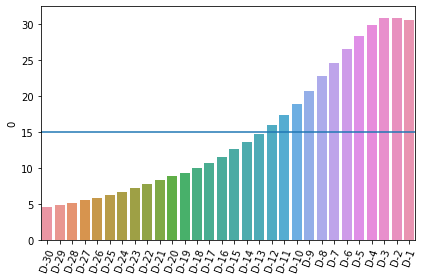

In [43]:
# D-1 ~ D-30별 각 환자의 ITEMID abnormal sum에 대한 평균 
m = pd.DataFrame(ab_rate2.mean())

_ = sns.barplot(data=m,x=m.index,y=m[0])
_ = plt.xticks(rotation=70)
_ = plt.tight_layout()
_ = plt.axhline(y=m.mean().values)

In [ ]:
# ab_rate2['1~5']=ab_rate2.iloc[:,-5:].sum(axis=1)
# ab_rate2['6~10']=ab_rate2.iloc[:,-10:-5].sum(axis=1)
# ab_rate2['11~15']=ab_rate2.iloc[:,-15:-10].sum(axis=1)
# ab_rate2['16~20']=ab_rate2.iloc[:,-20:-15].sum(axis=1)
# ab_rate2['21~25']=ab_rate2.iloc[:,-25:-20].sum(axis=1)
# ab_rate2['26~30']=ab_rate2.iloc[:,0:5].sum(axis=1)

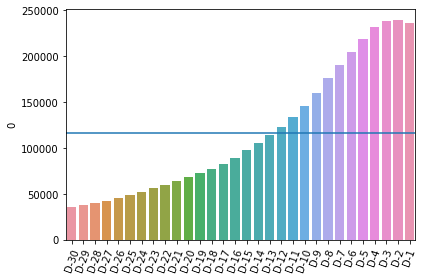

In [53]:
# D-1 ~ D-30별 환자들의 ITEMID abnormal sum 계산
s1 = pd.DataFrame(ab_rate2.sum())

_ = sns.barplot(data=s1,x=s1.index,y=s1[0])
_ = plt.xticks(rotation=70)
_ = plt.tight_layout()
_ = plt.axhline(y=s1.mean().values)

In [65]:
# 환자들의 ITEMID abnormal sum의 구간별 비율
(s1.iloc[0:10,:].sum()/s1.sum()) * 100  # D-21 ~ D-30의 sum
(s1.iloc[10:20,:].sum()/s1.sum()) * 100 # D-11 ~ D-20의 sum
(s1.iloc[20:30,:].sum()/s1.sum()) * 100 # D-1 ~ D-10의 sum 

0    13.81762
dtype: float64

0    27.596637
dtype: float64

0    58.585743
dtype: float64

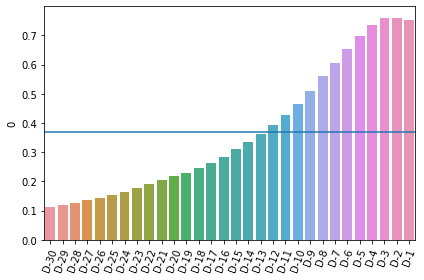

In [52]:
# D-1 ~ D-30별 환자들의 ( ITEMID abnormal sum / 7727 * 4068 ) * 100 ⇒ 비율 계산
sum_rate = pd.DataFrame((ab_rate2.sum()/(7727*4068))*100)

_ = sns.barplot(data=sum_rate,x=sum_rate.index,y=sum_rate[0])
_ = plt.xticks(rotation=70)
_ = plt.tight_layout()
_ = plt.axhline(y=sum_rate.mean().values)